In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
Stroke = pd.read_csv("C:/Users/ASUS/Tugas Mandiri SPADA DIKTI/Stroke/healthcare-dataset-stroke-data.csv")
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [41]:
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [42]:
#Data Preparation

In [43]:
Stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [44]:
Stroke.dropna(inplace=True)

In [45]:
Stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [46]:
#Data Cleaning

In [47]:
Stroke = Stroke.drop('id',axis=1)
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [48]:
Stroke['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [49]:
Stroke['ever_married'] = Stroke['ever_married'].map({'Yes':1,'No':0})
Stroke['Residence_type'] = Stroke['Residence_type'].map({'Urban':1,'Rural':0})
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 460.2+ KB


In [50]:
temp = pd.get_dummies(Stroke['gender'])
Stroke = pd.concat([Stroke,temp],axis=1)
Stroke.drop('gender',axis=1,inplace=True)

temp = pd.get_dummies(Stroke['work_type'])
Stroke = pd.concat([Stroke,temp],axis=1)
Stroke.drop('work_type',axis=1,inplace=True)

temp = pd.get_dummies(Stroke['smoking_status'])
Stroke = pd.concat([Stroke,temp],axis=1)
Stroke.drop('smoking_status',axis=1,inplace=True)

In [51]:
#Not deleting the first column of dummy variables as I intend to perform EDA on them. 

In [52]:
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   int64  
 2   heart_disease      4909 non-null   int64  
 3   ever_married       4909 non-null   int64  
 4   Residence_type     4909 non-null   int64  
 5   avg_glucose_level  4909 non-null   float64
 6   bmi                4909 non-null   float64
 7   stroke             4909 non-null   int64  
 8   Female             4909 non-null   uint8  
 9   Male               4909 non-null   uint8  
 10  Other              4909 non-null   uint8  
 11  Govt_job           4909 non-null   uint8  
 12  Never_worked       4909 non-null   uint8  
 13  Private            4909 non-null   uint8  
 14  Self-employed      4909 non-null   uint8  
 15  children           4909 non-null   uint8  
 16  Unknown            4909 

In [53]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [54]:
imputer = IterativeImputer()
col = Stroke.columns
Stroke = imputer.fit_transform(Stroke)
Stroke = pd.DataFrame(Stroke,columns=col)

In [55]:
Stroke.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0.0,0.0,1.0,1.0,186.21,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   float64
 2   heart_disease      4909 non-null   float64
 3   ever_married       4909 non-null   float64
 4   Residence_type     4909 non-null   float64
 5   avg_glucose_level  4909 non-null   float64
 6   bmi                4909 non-null   float64
 7   stroke             4909 non-null   float64
 8   Female             4909 non-null   float64
 9   Male               4909 non-null   float64
 10  Other              4909 non-null   float64
 11  Govt_job           4909 non-null   float64
 12  Never_worked       4909 non-null   float64
 13  Private            4909 non-null   float64
 14  Self-employed      4909 non-null   float64
 15  children           4909 non-null   float64
 16  Unknown            4909 

In [57]:
#EDA

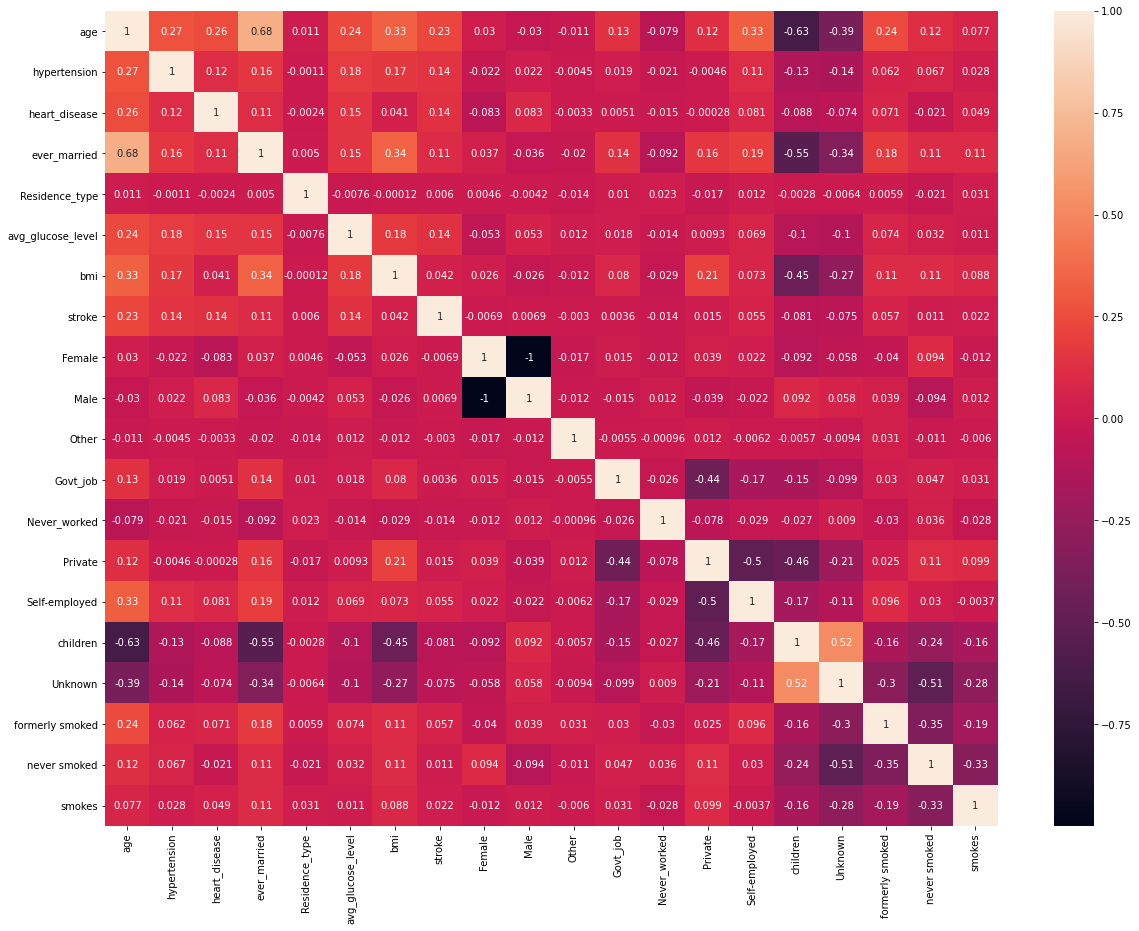

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(Stroke.corr(),annot=True)
plt.show()

In [59]:
#Stroke has a relatively high correlation compared to the other variables with Age, hypertension, heart disease, glucose level 
#and marrital status. 

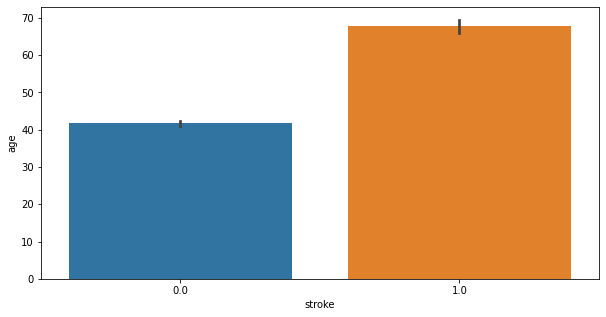

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x='stroke',y='age',data=Stroke)
plt.show()

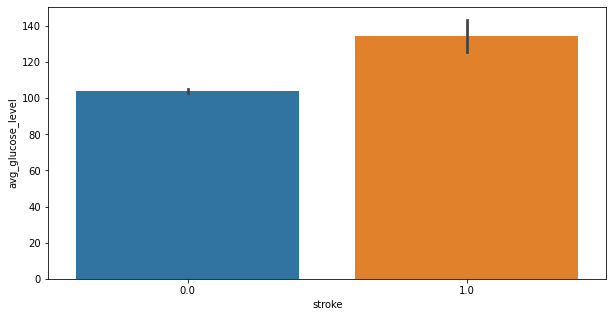

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='stroke',y='avg_glucose_level',data=Stroke)
plt.show()

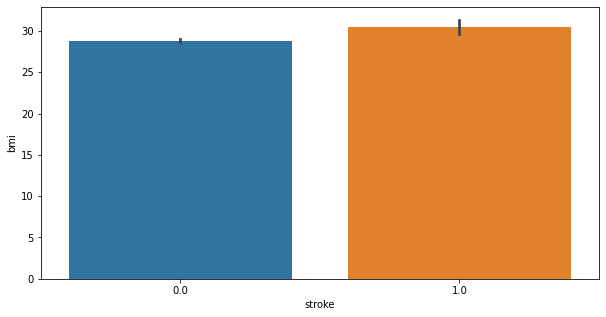

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='stroke',y='bmi',data=Stroke)
plt.show()

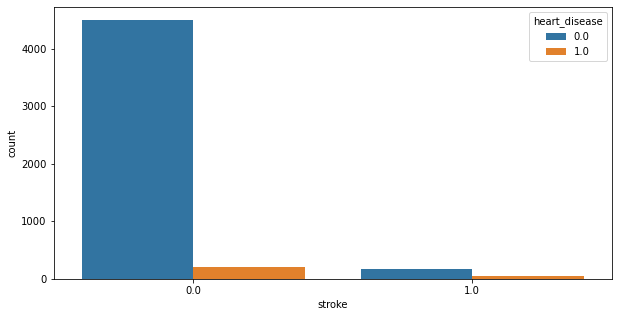

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x='stroke',hue='heart_disease',data=Stroke)
plt.show()

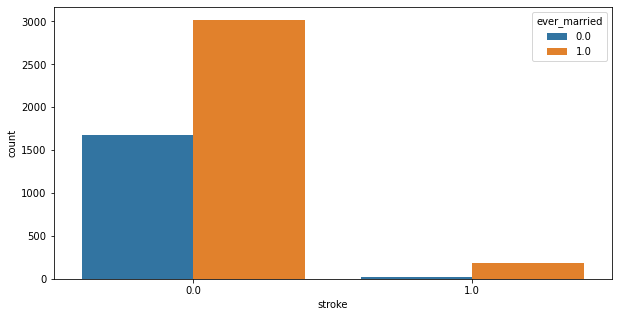

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x='stroke',hue='ever_married',data=Stroke)
plt.show()

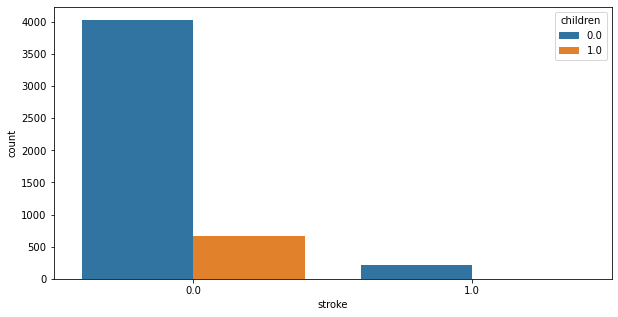

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x='stroke',hue='children',data=Stroke)
plt.show()

In [66]:
#Strokes occur with higher age and glucose level as well as bmi to a much lower degree. 

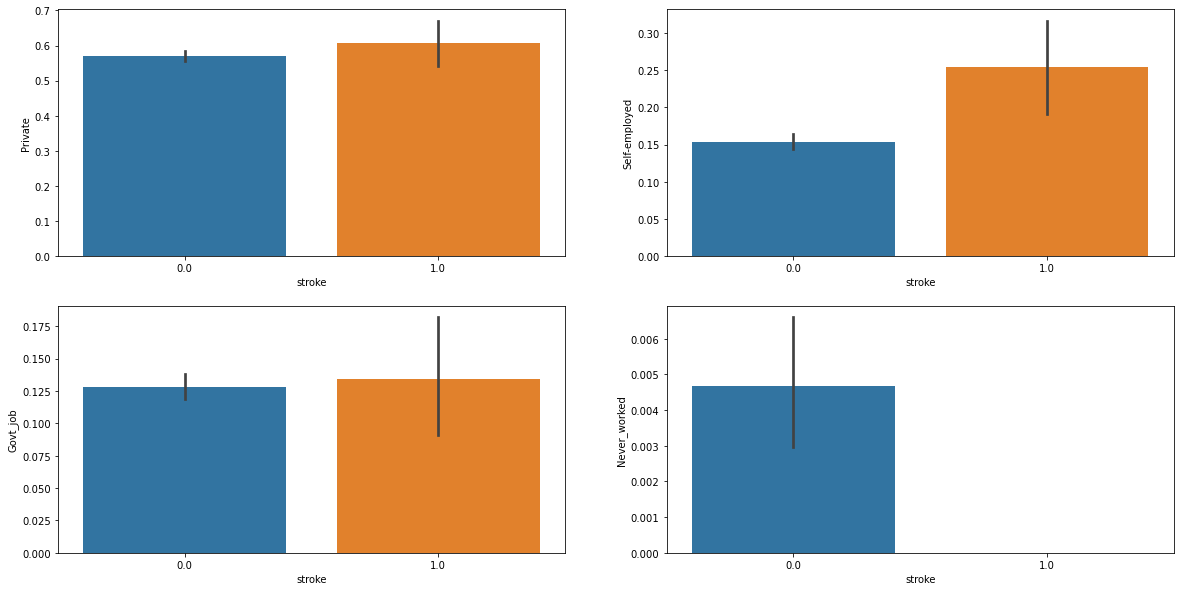

In [67]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='stroke',y='Private',data=Stroke)
plt.subplot(2,2,2)
sns.barplot(x='stroke',y='Self-employed',data=Stroke)
plt.subplot(2,2,3)
sns.barplot(x='stroke',y='Govt_job',data=Stroke)
plt.subplot(2,2,4)
sns.barplot(x='stroke',y='Never_worked',data=Stroke)
plt.show()

In [68]:
#Greater occurance of stroke when self emplyed or private. 

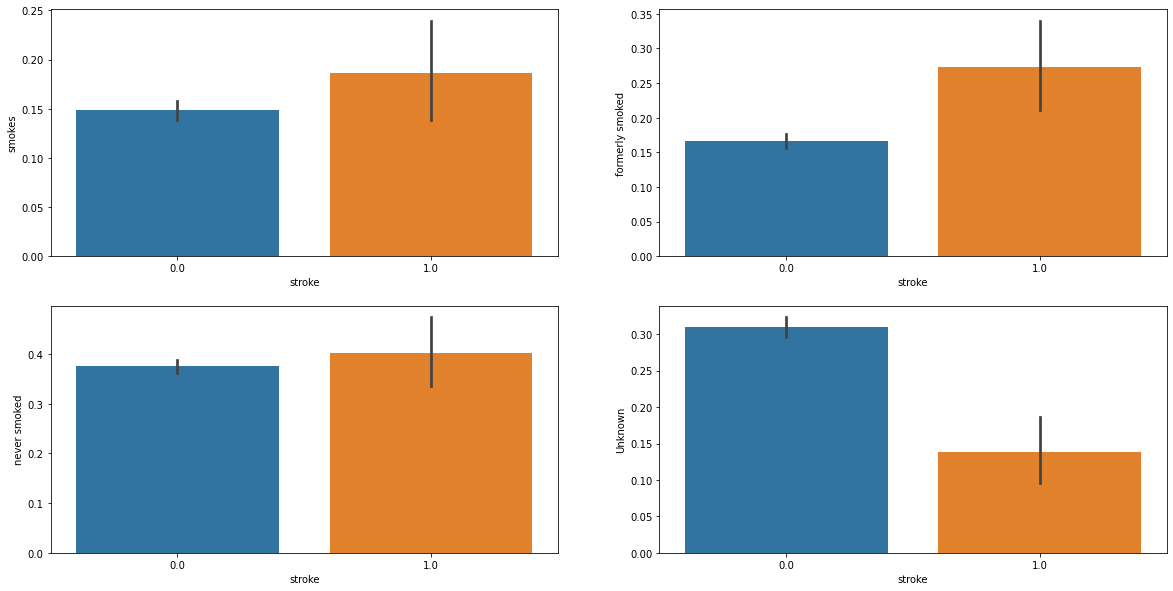

In [69]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='stroke',y='smokes',data=Stroke)
plt.subplot(2,2,2)
sns.barplot(x='stroke',y='formerly smoked',data=Stroke)
plt.subplot(2,2,3)
sns.barplot(x='stroke',y='never smoked',data=Stroke)
plt.subplot(2,2,4)
sns.barplot(x='stroke',y='Unknown',data=Stroke)
plt.show()

In [70]:
#greater occurance of stroke when smokes and formerly smoked. However between the two greater occurance when the person has 
#formery smoked

In [71]:
Stroke['stroke'].value_counts()

0.0    4700
1.0     209
Name: stroke, dtype: int64

In [72]:
#Prediction

In [73]:
X = Stroke.drop('stroke',axis=1)
y = Stroke['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
X_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
3160,2.0,0.0,0.0,0.0,1.0,105.05,20.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1439,32.0,0.0,0.0,0.0,0.0,67.92,22.8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1487,54.0,0.0,0.0,1.0,1.0,65.49,34.7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1993,55.0,0.0,0.0,1.0,1.0,76.51,34.7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2697,43.0,0.0,0.0,1.0,0.0,142.12,28.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

In [ ]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

params = {'n_estimators':[50,100,200],
          'min_samples_leaf':[10,30,50,70,100,200],
          'max_depth':[3,5,10,20,40,60,100],
          'max_features':[0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],
          'criterion':["gini","entropy"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(X_train,y_train)

In [ ]:
Model_best = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import f1_score,recall_score,plot_roc_curve

In [ ]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(f1_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

In [ ]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(f1_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [ ]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

params = {'n_estimators':[50,100,200],
          'min_samples_leaf':[10,30,50,70,100,200],
          'max_depth':[3,5,10,20,40,60,100],
          'max_features':[0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],
          'criterion':["gini","entropy"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

In [ ]:
Model_best = grid_search.best_estimator_

In [ ]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(f1_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

In [ ]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(f1_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [ ]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance = Feature_importance.set_index('Feature')

In [ ]:
Feature_importance

In [ ]:
#Using recall as the metric for validation as well as accuracy. 
#However giving a lot more importance to recall as predicting True positives are the most important.

In [ ]:
col = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[col])
X_scaled = pd.DataFrame(X_scaled,columns=col)
X_scaled.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.7,random_state=100)
X_train.head()

In [ ]:
from sklearn.svm import SVC

In [ ]:
Model = SVC(random_state=100,class_weight='balanced')

params = {'C':[0.01,0.1,1,10,100,1000,10000],
          'gamma':[10,1,0.1,0.001,0.0001,0.00001]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(X_train,y_train)

In [ ]:
Model_best = grid_search.best_estimator_

In [ ]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(f1_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

In [ ]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(f1_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [ ]:
Model = SVC(random_state=100,class_weight='balanced')

params = {'C':[0.01,0.1,1,10,100,1000,10000],
          'gamma':[10,1,0.1,0.001,0.0001,0.00001]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

In [ ]:
Model_best = grid_search.best_estimator_

In [ ]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(f1_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

In [ ]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(f1_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))